In [4]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq, fsolve
from numpy.linalg import eig
import seaborn as sns
from sympy import *

%matplotlib widget



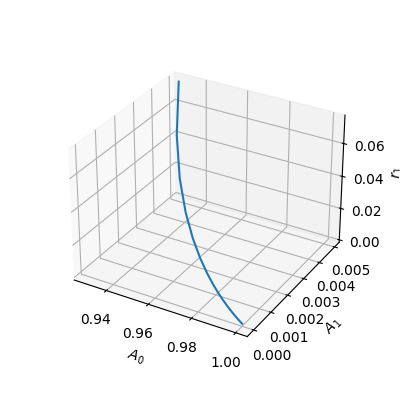

In [5]:
kon = 1e5
Ainnit = 1e-10
k = kon*Ainnit
rho = 0.2
delta = 4
koff = 1e-4

def model(t, z):
    dA0 = -2*k*rho*(z[0])*(1 - z[2]) + koff*((1- (z[0]) - (z[1])))*(z[2])
    dA2 = k*rho*delta*((1 - (z[0]) - (z[1])))*((1-(z[2]))) - 2*koff*(z[1])*(z[2])
    dr1 = 2*k*rho*(z[0])*((1-(z[2]))) - koff*((1 - (z[0]) - (z[1])))*(z[2]) + k*delta*rho*((1-(z[0])-(z[1])))*((1-(z[2]))) - 2*koff*(z[1])*(z[2])

    dz = [dA0, dA2, dr1]
    return dz

t_end = 20000
z0 = [1, 0, 0]
t = np.geomspace(1e-6, t_end, 100)
t_span = [0, t_end]
z = solve_ivp(model, t_span, z0, method="Radau", t_eval=t)

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(z.y[0], z.y[1], z.y[2])
ax.set_xlabel(r'$A_0$')
ax.set_ylabel(r'$A_1$')
ax.set_zlabel(r'$r_1$')
plt.show()